In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from graphviz import Source

In [118]:
url = "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"

# Load data
data = pd.read_csv("creditcard.csv", sep = ",") 

# Analyze data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Overall Analysis

The data set has very few fraud cases.

0    284315
1       492
Name: Class, dtype: int64

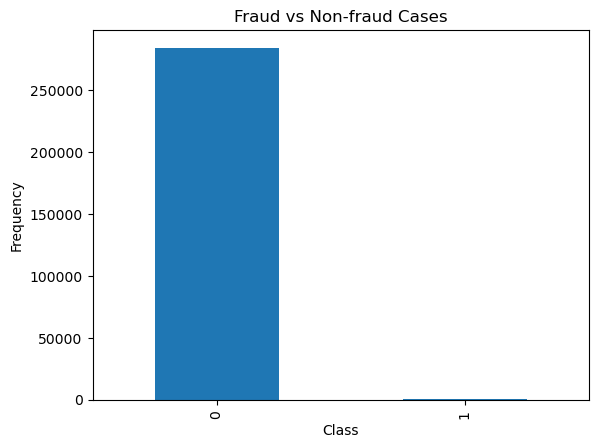

In [119]:
#More analysis

pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud vs Non-fraud Cases')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

### Missing Values

Checking for missing values

In [120]:
print('There are {} records with missing values'.format(sum(data.isnull().values.any(axis=1))))

There are 0 records with missing values


# CLassification

Splitting the data for classification

In [121]:
X = data.drop(['Time', 'Amount'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state = 30, shuffle = True, stratify=y)

y_train.value_counts()

0    142157
1       246
Name: Class, dtype: int64

### Decision Tree Classifier

In [122]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('The accuracy score for the model is: {:.2f}%'.format(accuracy*100))

The accuracy score for the model is: 100.00%


[[142158      0]
 [     0    246]]


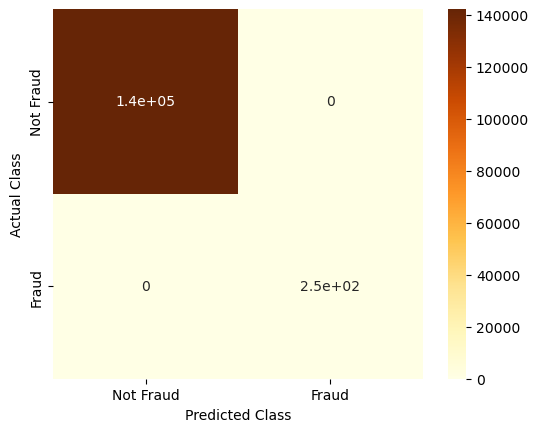

In [123]:
cf_matrix = confusion_matrix(y_test, y_pred)

labels= ['Not Fraud', 'Fraud']  
sns.heatmap(cf_matrix, xticklabels = labels, yticklabels = labels, square=True, annot=True, cmap='YlOrBr')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class');

print(cf_matrix)

### Random Forest Classifier

In [124]:
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)

print('The accuracy score for the model is: {:.2f}%'.format(accuracy*100))

The accuracy score for the model is: 100.00%


[[142158      0]
 [     0    246]]


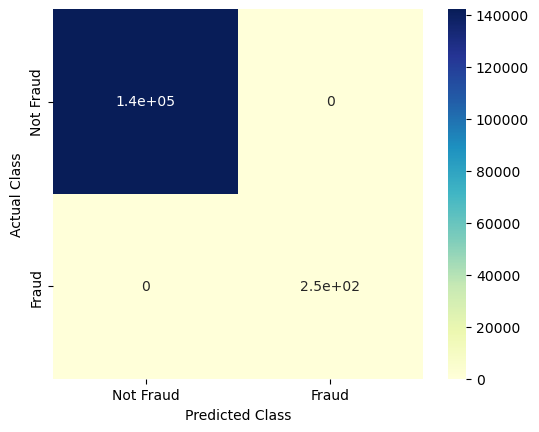

In [125]:
cf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

labels= ['Not Fraud', 'Fraud']  
sns.heatmap(cf_matrix_rfc, xticklabels = labels, yticklabels = labels, square=True, annot=True, cmap='YlGnBu')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class');

print(cf_matrix_rfc)

### Navie Bayes Classifier

In [126]:
gnb = GaussianNB().fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gnb)

print('The accuracy score for the model is: {:.2f}%'.format(accuracy*100))


The accuracy score for the model is: 100.00%


[[142158      0]
 [     0    246]]


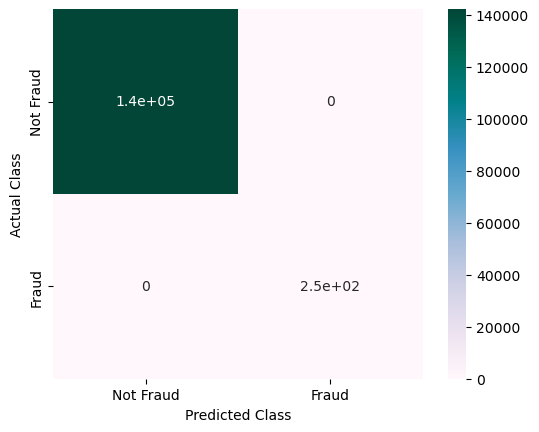

In [127]:
cf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

labels= ['Not Fraud', 'Fraud'] 
sns.heatmap(cf_matrix_gnb, xticklabels = labels, yticklabels = labels, square=True, annot=True, cmap='PuBuGn')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class');

print(cf_matrix_gnb)